 # 911 Calls Data Analysis


This project explores 911 emergency call data to identify key patterns and insights.  
The dataset includes information such as call reason, timestamp, location (latitude, longitude, township, zipcode), and descriptive details about each emergency call.  

### Objectives
- Analyze call frequency by reason (Traffic, Fire, EMS).  
- Explore temporal trends (by hour, day of week, month).  
- Visualize spatial and time-based distributions.  
- Derive insights that can help understand emergency response demands.  

### Tools Used
- **Python**
- **Pandas, NumPy** for data handling  
- **Matplotlib, Seaborn** for visualization
  
## Key Insights

-  Most 911 calls were related to EMS (medical emergencies).

- Call volumes were generally higher during the daytime compared to night hours.

- Certain ZIP codes and townships reported more emergency calls than others.

## Importing Libraries


In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Dataset


In [3]:
df= pd.read_csv('911.csv')

### Dataset Information


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### Preview of the Data


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Top 5 Zipcodes for 911 Calls


In [6]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

## Top 5 Townships for 911 Calls


In [7]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

## Number of Unique Call Titles


In [8]:
df['title'].nunique()

110

## Creating a New Column for Reason


In [9]:
df['Reason']= df['title'].apply(lambda t : t.split(':')[0])

In [10]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


### Most Common Reasons for 911 Calls


In [11]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

### Visualization of 911 Calls by Reason


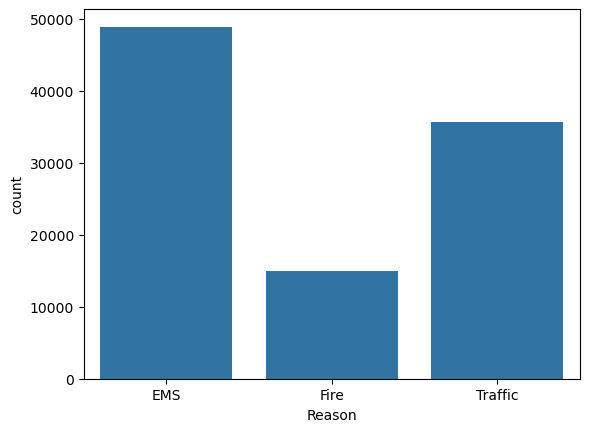

In [12]:
sns.countplot(x='Reason',data=df)
plt.show()

## Exploring the TimeStamp Column

In [13]:
type(df['timeStamp'].iloc[0])

str

 ### Converting TimeStamp to DateTime

In [14]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

## Extracting Date and Time Features

In [15]:
df['Hour']= df['timeStamp'].apply(lambda time: time.hour)
df['Month']= df['timeStamp'].apply(lambda time: time.month)
df['Day Of Week']= df['timeStamp'].apply(lambda time: time.dayofweek)

## Mapping Numeric Days to Weekday Names

In [16]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [17]:
df['Day Of Week']= df['Day Of Week'].map(dmap)

## Visualizing Emergency Calls by Day of the Week

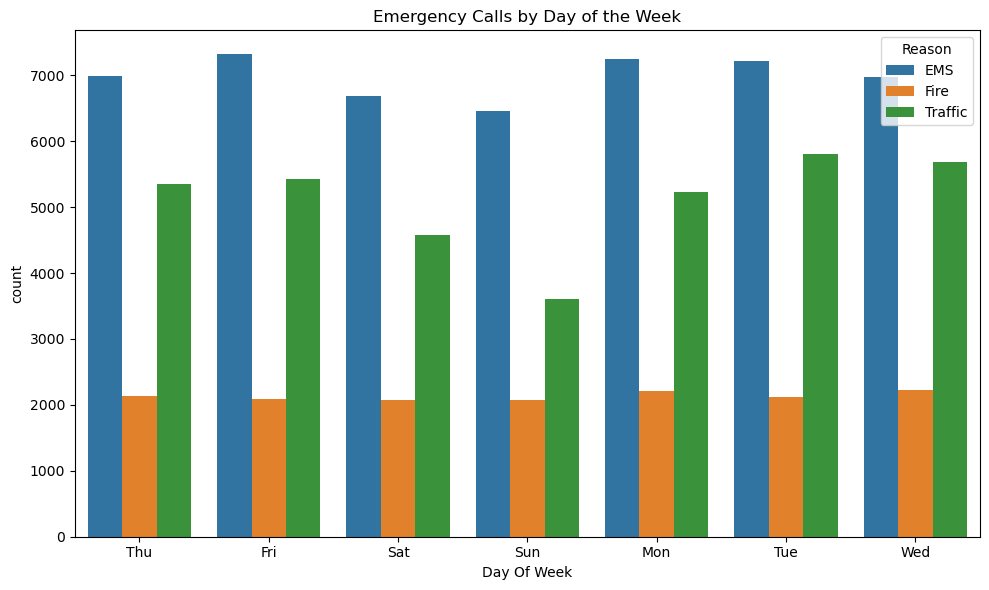

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='Day Of Week', data=df, hue='Reason')
plt.title("Emergency Calls by Day of the Week")
plt.tight_layout()
plt.savefig("images/calls_by_day.png", dpi=200, bbox_inches="tight")  
plt.show()


## Visualizing Emergency Calls by Month

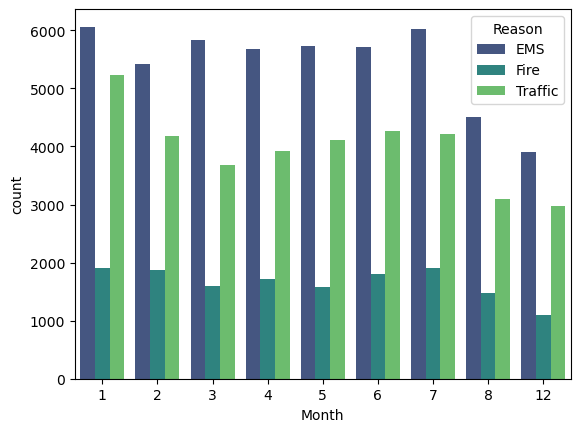

In [21]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.show()

## Grouping Data by Month for Aggregation

In [22]:
bymonth= df.groupby('Month').count()
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day Of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


## Line Plot of Monthly 911 Calls

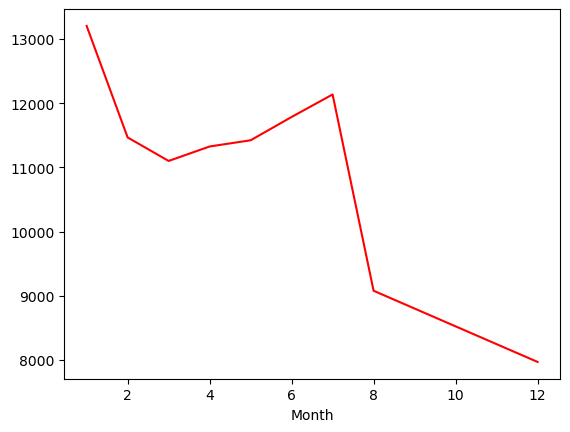

In [23]:
bymonth['timeStamp'].plot(color='red')
plt.show()

**Figure:** A line chart showing how many 911 calls happened each month.


## Linear Regression Fit of Calls per Month

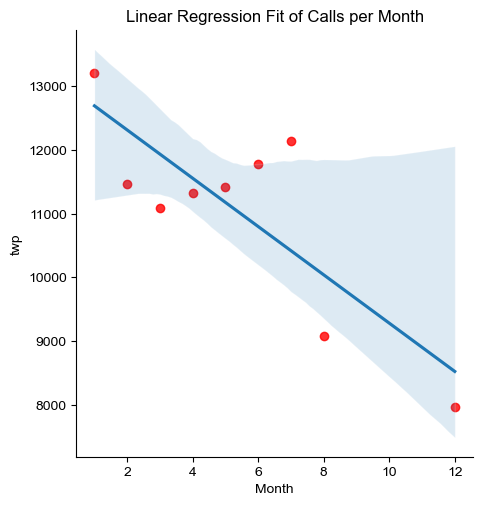

In [24]:
sns.lmplot(x='Month', y='twp', data=bymonth.reset_index(),
           scatter_kws={'color': 'red'})
sns.set_style("whitegrid")
plt.title("Linear Regression Fit of Calls per Month")
plt.savefig("images/calls_per_month.png", dpi=200, bbox_inches="tight")
plt.show()


**Figure:** A simple trend line showing if 911 calls increased or decreased over the months.


## Extracting Date from Timestamp

In [31]:
df['Date']=df['timeStamp'].apply(lambda time:time.date())

## Daily 911 Call Volume Over Time


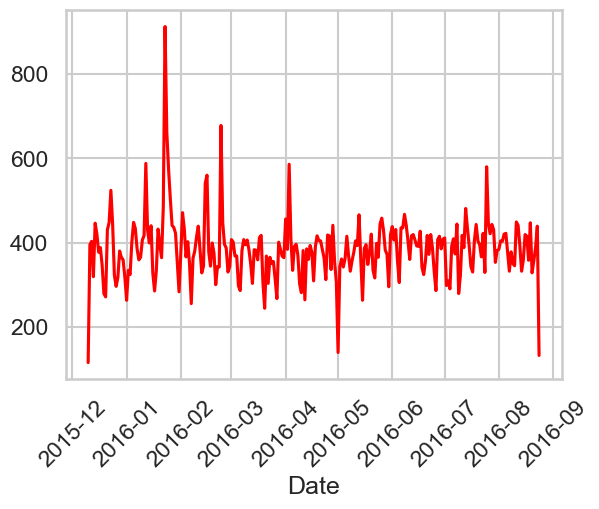

In [39]:
df.groupby('Date').count()['twp'].plot(color='red')
plt.xticks(rotation=45)
plt.show()

**Figure:** A line chart showing the number of 911 calls each day. We can see that the calls go up and down with some big spikes on certain dates.


 ## Daily 911 Calls for Traffic Incidents

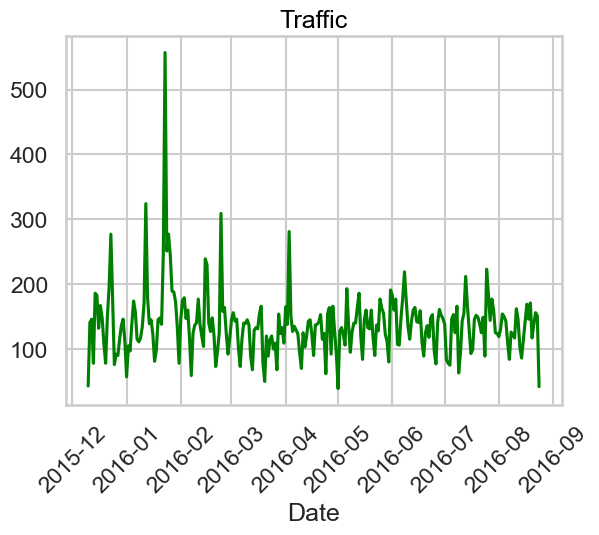

In [48]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot(color='green')
plt.title('Traffic',color='black')
plt.xticks(rotation=45)
plt.show()

## Daily 911 Calls for Fire Incidents

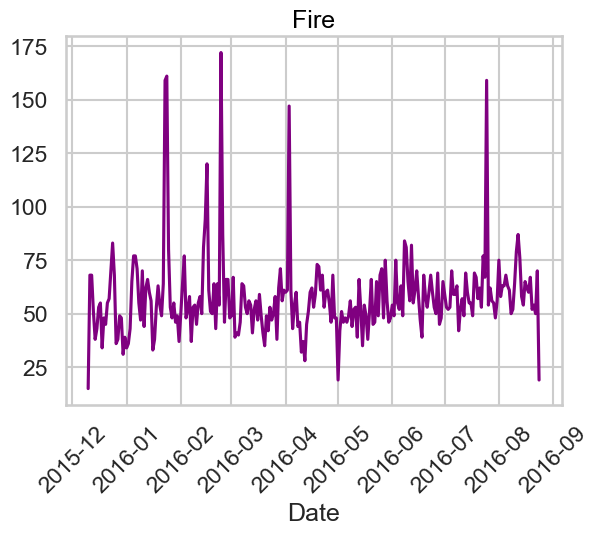

In [49]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot(color='purple')
plt.title('Fire',color='black')
plt.xticks(rotation=45)
plt.show()

## Daily 911 Calls for EMS

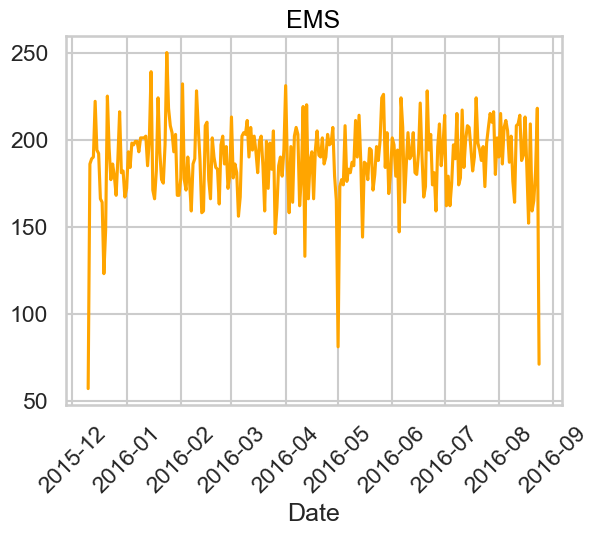

In [50]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot(color='orange')
plt.title('EMS',color='black')
plt.xticks(rotation=45)
plt.show()

**Figures:** Line charts showing daily 911 calls for Traffic, Fire, and EMS. Each plot shows how calls change over time for that category.


## 911 Calls Grouped by Day of Week and Hour (Table View)

In [10]:
dayHour= df.groupby(by=['Day Of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day Of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


This table shows how many 911 calls happened for each day of the week and each hour of the day.


## Heatmap of 911 Calls by Day of Week and Hour

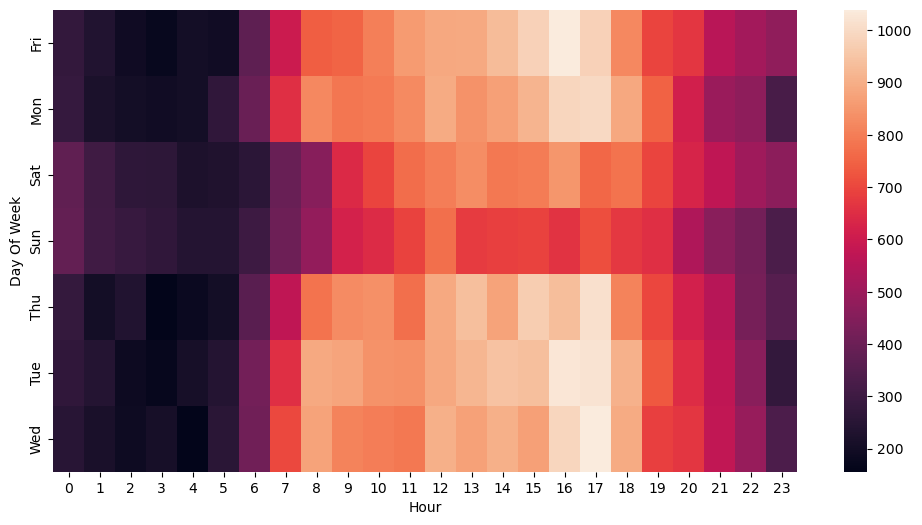

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour)
plt.show()

**Figure:** A heatmap showing 911 calls by day of the week and hour of the day. Most calls happen during the daytime, especially between late morning and evening.


## Cluster Map of 911 Calls by Day of Week and Hour

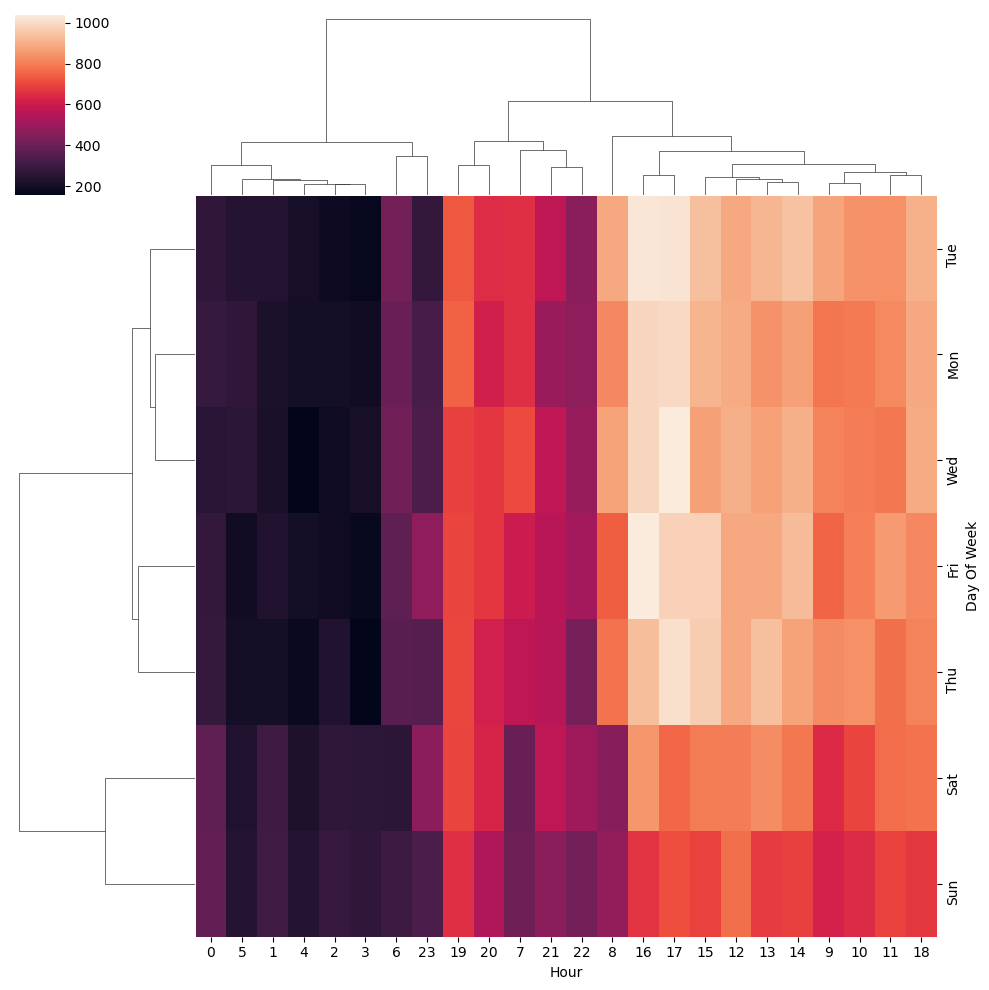

In [16]:

sns.clustermap(dayHour)
plt.show()

**Figure:** A cluster map showing 911 calls by day of the week and hour. The clustering groups similar patterns together, making it easier to see which times have the highest call volumes.


## 911 Calls Grouped by Day of Week and Month (Table View)

In [25]:
dayMonth=df.groupby(by=['Day Of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day Of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


## Heatmap of 911 Calls by Day of Week and Month

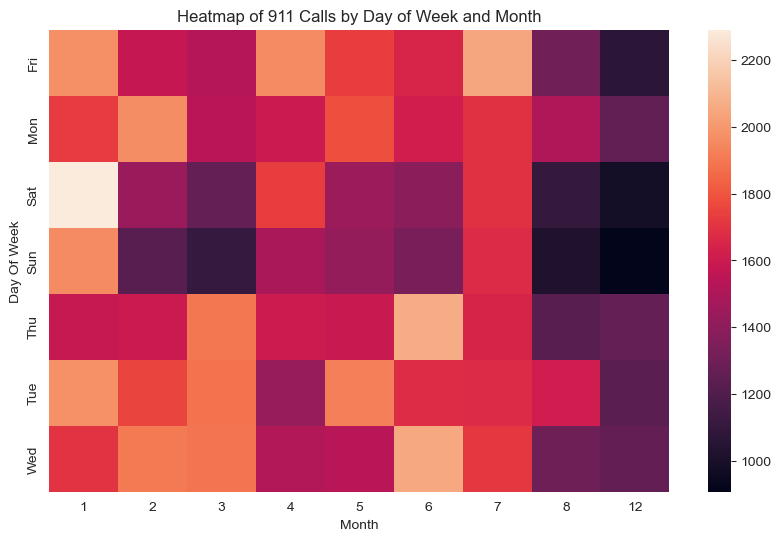

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(dayMonth)
plt.title("Heatmap of 911 Calls by Day of Week and Month")
plt.savefig("images/heatmap_day_month.png", dpi=200, bbox_inches="tight")
plt.show()


**Figure:** A heatmap showing 911 calls by day of the week and month. We can see that call volumes are higher in some months and vary across different days.


## Cluster Map of 911 Calls by Day of Week and Month

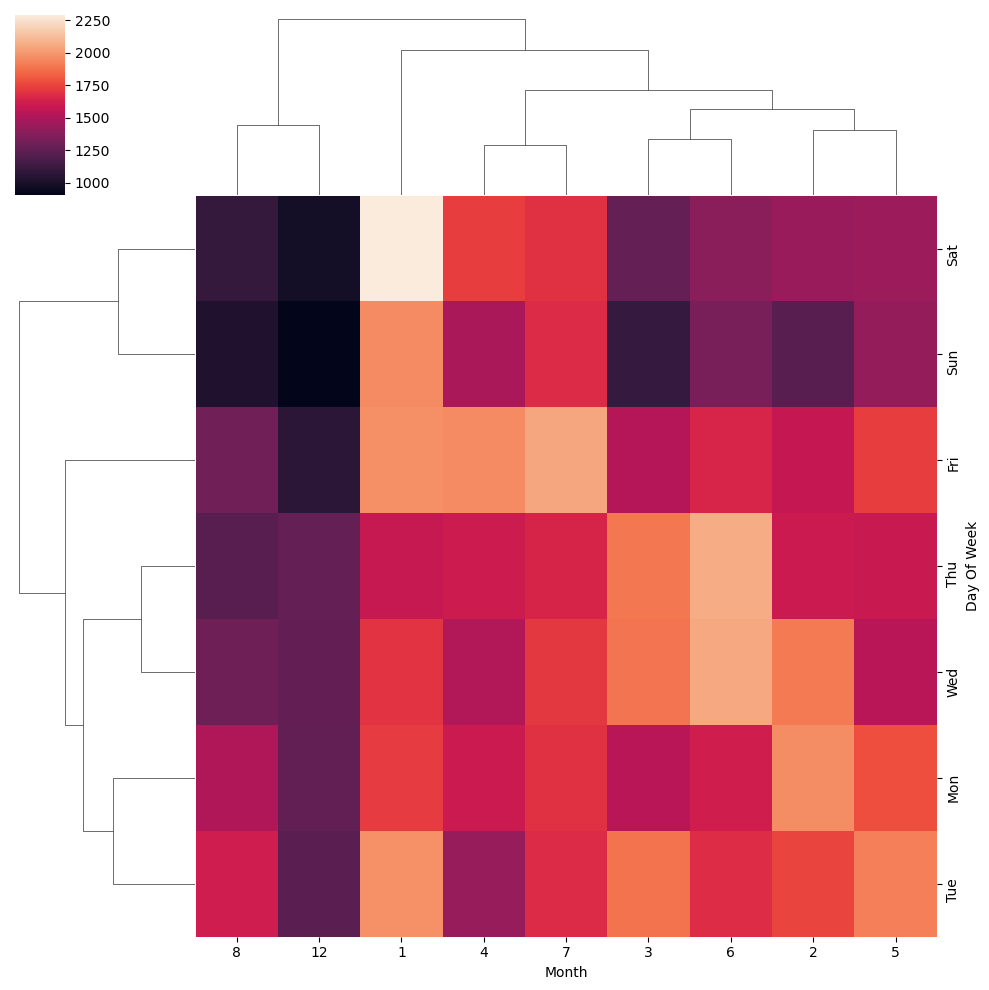

In [20]:
sns.clustermap(dayMonth)
plt.show()

**Figure:** A cluster map showing 911 calls by day of the week and month. The clustering groups similar days and months together, helping to see common call patterns.
